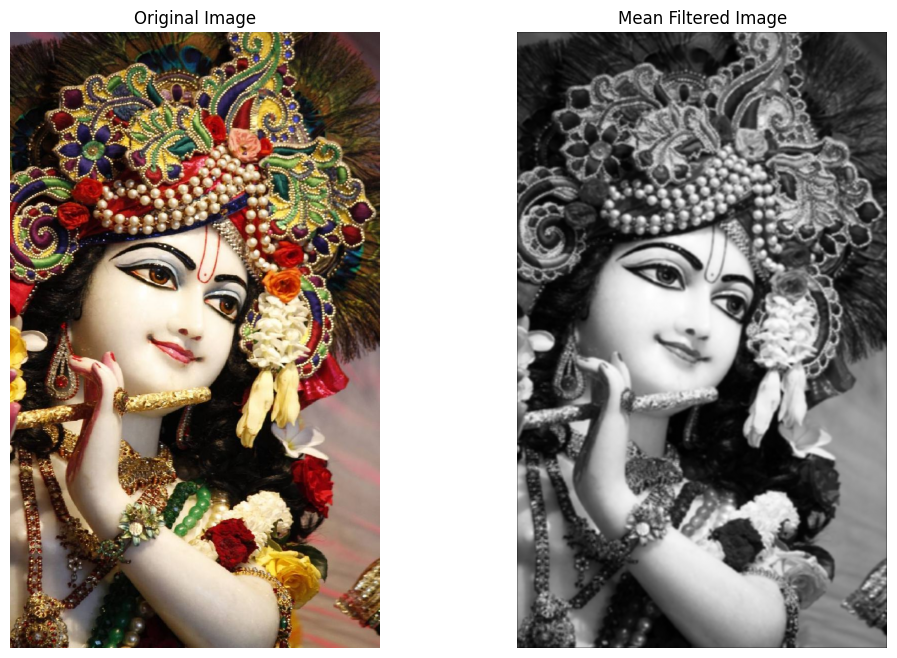

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def mean_filter(image, kernel_size=3):
    """
    Apply a mean filter to the input image.

    Parameters:
    image (numpy array): The input image to be filtered.
    kernel_size (int): Size of the square kernel (odd number).

    Returns:
    numpy array: The filtered image.
    """
    # Convert image to grayscale if it is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Pad the image to handle borders
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    # Prepare an empty output image
    output_image = np.zeros_like(image)

    # Apply the mean filter to each pixel in the image
    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            # Extract the region of interest (ROI)
            roi = padded_image[i-pad:i+pad+1, j-pad:j+pad+1]
            # Compute the mean of the region
            mean_value = np.mean(roi)
            output_image[i-pad, j-pad] = mean_value

    return output_image

# Load an image (grayscale or color)
image = cv2.imread('/content/diksha.jpg')

# Apply the Mean Filter
filtered_image = mean_filter(image, kernel_size=5)

# Display the original and filtered images
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title('Mean Filtered Image'), plt.axis('off')
plt.show()
